# LEAST SQUARES

$$
\begin{aligned}
AX &= B \Rightarrow X\beta = y \\
(X^T X)^{-1} X^T X\beta &= (X^T X)^{-1} X^T y \\
\beta &= (X^T X)^{-1} X^T y
\end{aligned}
$$


$$
\begin{aligned}
\beta &= (X^T X)^{-1} X^T y \Rightarrow y \in C(X) \\[0.5em]
\text{Otherwise:} \\[0.5em]
\beta &= (X^T X)^{-1} X^T y^{a} \\[0.5em]
\text{Then:} \quad
&\left\{
\begin{array}{l}
y^{a} \in C(X) \\
y = X\beta + \epsilon \Rightarrow (y+\epsilon) \in C(X)
\end{array}
\right.
\end{aligned}
$$


In [166]:
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt
import scipy.io as sio


In [71]:
m = 10
n = 3

#create data
X = np.random.randn(m,n) #design matrix
y = np.random.randn(m, 1) #outcome measures (data)

np.shape(y)

(10, 1)

In [73]:
print(f"Matrix X: \n {X}"), print(" ")
print(f"Matrix y: \n {y}"), print(" ")

Matrix X: 
 [[ 0.73442924 -0.62484215 -0.18717041]
 [-0.73145854 -0.74336685 -1.90981731]
 [-0.19414905 -0.36907752 -0.62081246]
 [-0.57395747  2.45211526  0.25757598]
 [-1.23794883  0.84549305 -0.23693095]
 [-0.88500498  0.12173219 -0.06936101]
 [ 0.01236298  0.84969526  0.01758185]
 [ 0.45776717  1.97554087 -0.55162254]
 [ 0.05549468 -0.96710617  0.29838295]
 [ 0.7280732  -0.15279942 -1.00439104]]
 
Matrix y: 
 [[-0.69694784]
 [-0.36671128]
 [-0.24048944]
 [-0.61287868]
 [-1.53310997]
 [-0.43941992]
 [-0.22981242]
 [-0.48676878]
 [-0.05725059]
 [ 0.01958627]]
 


(None, None)

In [75]:
#try directly applying RREF
Xy = Matrix (np.concatenate([X,y], axis = 1))
print(Xy.rref())

(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]]), (0, 1, 2, 3))


In [83]:
#now reapply to the normal equations
XtX = X.T@X
Xty = X.T@y
normEQ = Matrix(np.concatenate([XtX, Xty], axis = 1))
print(XtX), print(" ")
print(Xty), print(" ")
print(normEQ)

[[ 4.50016391 -1.65540077  0.61986563]
 [-1.65540077 13.40517247  0.97870252]
 [ 0.61986563  0.97870252  5.59756592]]
 
[[ 2.22704802]
 [-3.16025945]
 [ 1.44367261]]
 
Matrix([[4.50016390670905, -1.65540077331739, 0.619865627376073, 2.22704802273300], [-1.65540077331739, 13.4051724667056, 0.978702524238679, -3.16025944732812], [0.619865627376073, 0.978702524238679, 5.59756591528227, 1.44367260713801]])


In [85]:
Xsol = normEQ.rref()
Xsol = Xsol[0]
beta = Xsol[:,-1]

print(np.array(Xsol)), print(" ")
print(beta), print(' ')

[[1 0 0 0.384217529318084]
 [0 1 0 -0.206663984697949]
 [0 0 1 0.251497160029511]]
 
Matrix([[0.384217529318084], [-0.206663984697949], [0.251497160029511]])
 


(None, None)

In [87]:
#compare to the left- inverse
beta2 = np.linalg.inv(XtX) @ Xty
print(beta2)

[[ 0.38421753]
 [-0.20666398]
 [ 0.25149716]]


In [89]:
# with python solver
beta3 = np.linalg.solve(XtX, Xty)
print(beta3)

[[ 0.38421753]
 [-0.20666398]
 [ 0.25149716]]


In [95]:
#data
data = np.array([[-4, 0, -3, 1, 2, 8 ,5, 8]]).T
N = len(data)
N

8

In [105]:
#design matrix
X = np.ones([N,1])
print(f"Matrix X: \n {X}"), print(' ')
print(f"data: \n {data}"), print(' ')

#fit the model
b = np.linalg.solve(X.T@X, X.T@data)
print(f"Solve X.T@X and X.T@data: \n {b}"), print(' ')

Matrix X: 
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
 
data: 
 [[-4]
 [ 0]
 [-3]
 [ 1]
 [ 2]
 [ 8]
 [ 5]
 [ 8]]
 
Solve X.T@X and X.T@data: 
 [[2.125]]
 


(None, None)

In [107]:
#compare against the mean
m = np.mean(data)
print(f"Mean m: \n {m}"), print(' ')

Mean m: 
 2.125
 


(None, None)

In [109]:
#results:

print(b, m)

[[2.125]] 2.125


[[2.125]
 [2.125]
 [2.125]
 [2.125]
 [2.125]
 [2.125]
 [2.125]
 [2.125]]
  
data: 
 [[-4]
 [ 0]
 [-3]
 [ 1]
 [ 2]
 [ 8]
 [ 5]
 [ 8]]
 


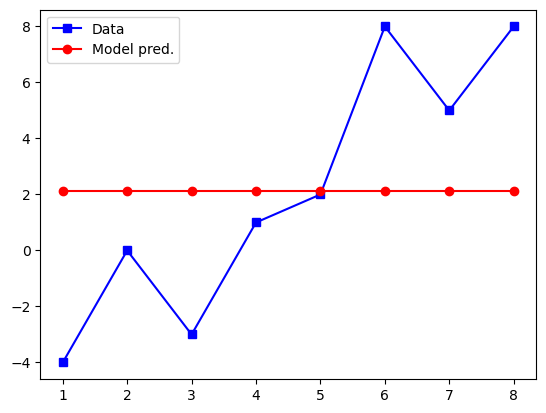

In [121]:
#making a plot
yHat = X@b
print(yHat), print('  ')
print(f"data: \n {data}"), print(' ')

plt.plot(np.arange(1, N+1), data, 'bs-', label='Data')
plt.plot(np.arange(1, N+1), yHat, 'ro-', label='Model pred.')
plt.legend()
plt.show()

In [129]:
X = np.array([np.arange(0,N)]).T
print(f"X: \n {X}"), print(' ')

#fit the model 
b = np.linalg.solve(X.T@X, X.T@data)
print(f"b: \n {b}"), print(' ')

#compute the model predicted values
yHat = X@b
print(f"yHat: \n {yHat}"), print(' ')

X: 
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]
 
b: 
 [[0.93571429]]
 
yHat: 
 [[0.        ]
 [0.93571429]
 [1.87142857]
 [2.80714286]
 [3.74285714]
 [4.67857143]
 [5.61428571]
 [6.55      ]]
 


(None, None)

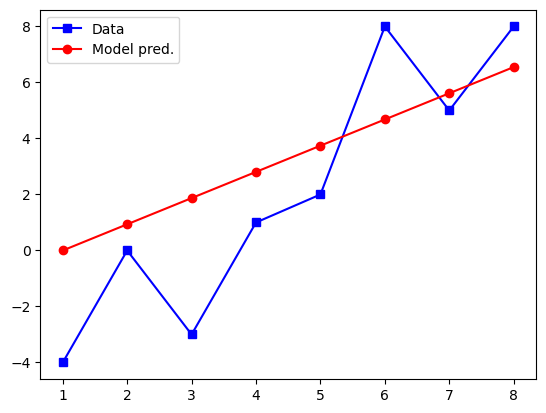

In [131]:

plt.plot(np.arange(1, N+1), data, 'bs-', label='Data')
plt.plot(np.arange(1, N+1), yHat, 'ro-', label='Model pred.')
plt.legend()
plt.show()

In [135]:
#design matrix
X = np.concatenate([np.ones([N,1]), np.array([np.arange(0,N)]).T], axis = 1)
print(f"X: \n {X}"), print(' ')

#fit the model 
b = np.linalg.solve(X.T@X, X.T@data)
print(f"b: \n {b}"), print(' ')

#compute the model predicted values
yHat = X@b
print(f"yHat: \n {yHat}"), print(' ')

X: 
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]]
 
b: 
 [[-3.83333333]
 [ 1.70238095]]
 
yHat: 
 [[-3.83333333]
 [-2.13095238]
 [-0.42857143]
 [ 1.27380952]
 [ 2.97619048]
 [ 4.67857143]
 [ 6.38095238]
 [ 8.08333333]]
 


(None, None)

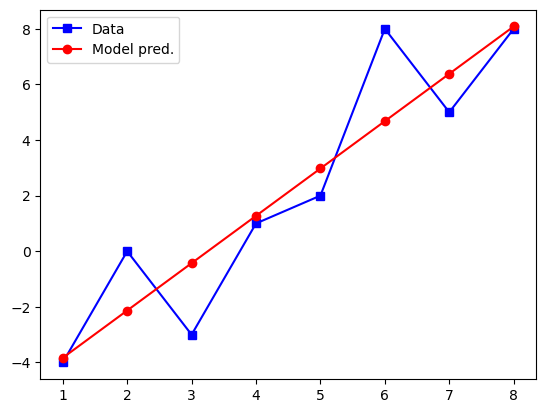

In [137]:
plt.plot(np.arange(1, N+1), data, 'bs-', label='Data')
plt.plot(np.arange(1, N+1), yHat, 'ro-', label='Model pred.')
plt.legend()
plt.show()

In [139]:
#now with nonlinearity in the design matrix

#design matrix
X = np.concatenate([np.ones([N,1]), np.array([np.arange(0,N)**2]).T], axis = 1)
print(f"X: \n {X}"), print(' ')

#fit the model 
b = np.linalg.solve(X.T@X, X.T@data)
print(f"b: \n {b}"), print(' ')

#compute the model predicted values
yHat = X@b
print(f"yHat: \n {yHat}"), print(' ')

X: 
 [[ 1.  0.]
 [ 1.  1.]
 [ 1.  4.]
 [ 1.  9.]
 [ 1. 16.]
 [ 1. 25.]
 [ 1. 36.]
 [ 1. 49.]]
 
b: 
 [[-1.83333333]
 [ 0.22619048]]
 
yHat: 
 [[-1.83333333]
 [-1.60714286]
 [-0.92857143]
 [ 0.20238095]
 [ 1.78571429]
 [ 3.82142857]
 [ 6.30952381]
 [ 9.25      ]]
 


(None, None)

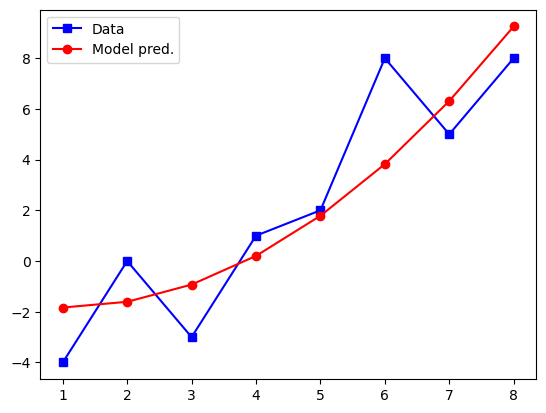

In [141]:
plt.plot(np.arange(1, N+1), data, 'bs-', label='Data')
plt.plot(np.arange(1, N+1), yHat, 'ro-', label='Model pred.')
plt.legend()
plt.show()

# EEG 0 RESPONSE TIME STATISTICAL MODEL

# $$
\begin{align*}
r &= \beta_{1}i + \beta_{2}p + \beta_{3}e \\
r &= \text{response time} \\
i & = \text{intercept} \\
p & = \text{previous trial response} \\
e & = \text{EEG energy}
\end{align*}
$$ 

$$
\begin{bmatrix}
1 & r_1 & e_1 \\
1 & r_2 & e_2 \\
1 & r_3 & e_3 \\
1 & r_4 & e_4 \\
1 & r_5 & e_5 \\
1 & r_6 & e_6 \\
1 & r_7 & e_7 \\
1 & r_8 & e_8
\end{bmatrix}
\cdot
\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\beta_3
\end{bmatrix}
=
\begin{bmatrix}
r^{(1)} \\
r^{(2)} \\
r^{(3)} \\
r^{(4)} \\
r^{(5)} \\
r^{(6)} \\
r^{(7)} \\
r^{(8)}
\end{bmatrix}
$$


rts: 
 [887.20703125 709.47265625 353.02734375 441.89453125 479.98046875
 534.1796875  417.96875    746.58203125 603.515625   437.98828125
 677.734375   732.91015625 416.015625   633.30078125 573.2421875
 762.20703125 604.00390625 512.20703125 541.50390625 559.5703125
 683.59375    463.37890625 477.5390625  498.046875   577.1484375
 703.125      543.9453125  402.34375    370.60546875 664.55078125
 556.640625   589.84375    636.23046875 760.25390625 754.39453125
 449.70703125 462.40234375 494.140625   425.29296875 316.89453125
 587.890625   520.01953125 500.9765625  447.75390625 556.15234375
 409.1796875  458.984375   578.125      639.16015625 468.26171875
 491.2109375  416.9921875  474.609375   468.75       665.0390625
 610.3515625  397.94921875 495.1171875  474.609375   389.6484375
 549.8046875  437.98828125 498.046875   506.34765625 606.4453125
 430.6640625  367.1875     515.625      472.65625    327.63671875
 483.88671875 346.6796875  458.49609375 393.06640625 394.53125
 554.1992187

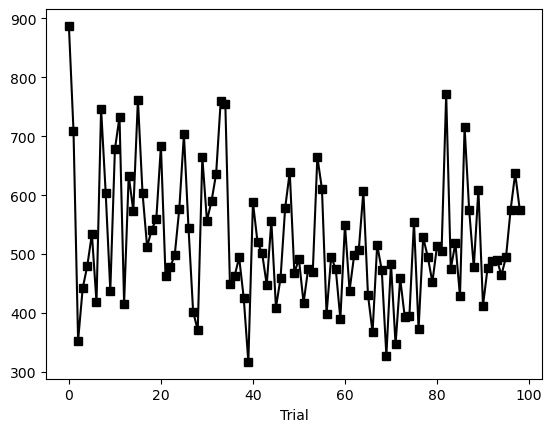

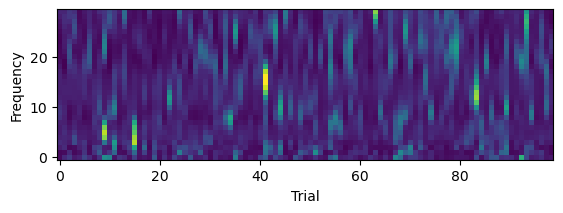

In [180]:
# Load data
#import scipy.io as sio

data = sio.loadmat('EEG_RT_data.mat')
rts = data['rts']
rts = rts[0]
print(f"rts: \n {rts}"), print(' ')
EEGdata = data['EEGdata']
frex = data['frex']
frex = frex[0]
print(f"frex: \n {frex}"), print(' ')

nTrials = len(rts)
nFrex = len(frex)

#show the data
plt.plot(rts, 'ks-')
plt.xlabel('Trial')
plt.show()

plt.imshow(EEGdata, origin='lower')
plt.xlabel('Trial'), plt.ylabel('Frequency')
plt.show()

In [184]:
#create and fit the model for one frequency

X = np.concatenate([np.ones([nTrials-1,1]), #intercept
                   np.reshape(rts[0:-1], (nTrials-1,1)), #RTs
                   np.reshape(EEGdata[10,:-1], (nTrials-1,1)) #brain
                   ], axis = 1)

b1 = np.linalg.solve(X.T@X, X.T@rts[1:])
b2 = np.linalg.lstsq(X, rts[1:], rcond=None)[0]
print(f"b1: \n {b1}")
print(f"b2: \n {b2}")

b1: 
 [ 4.02435056e+02  2.25627111e-01 -2.33132473e+01]
b2: 
 [ 4.02435056e+02  2.25627111e-01 -2.33132473e+01]


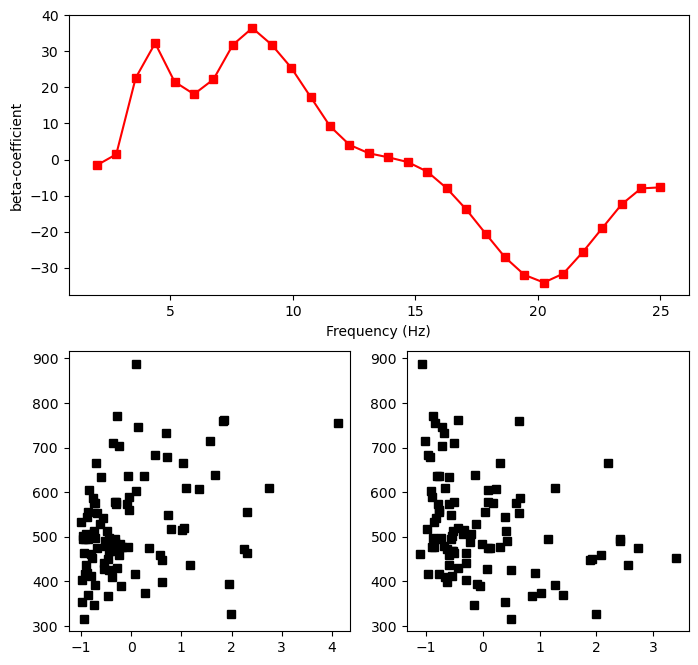

In [194]:
#initialize beta coefficients vector
b = np.zeros(len(frex))

#loop over frequencies
for fi in np.arange(0, len(frex)):
    #design matrix
    X = np.concatenate([np.ones([nTrials,1]), #intercept
                   np.reshape(EEGdata[fi,:], (nTrials,1)) #brain
                   ], axis = 1)
    #compute parameters
    t = np.linalg.lstsq(X, rts, rcond=None)[0]
    b[fi] = t[1]

#plots
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(frex, b, 'rs-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('beta-coefficient')

plt.subplot(223)
plt.plot(EEGdata[8,:], rts, 'ks')

plt.subplot(224)
plt.plot(EEGdata[23,:], rts, 'ks')
plt.show()


### challenge

In [205]:
#generate random data
m = 10
n = 3

X = np.random.randn(m,n)
y = np.random.randn(m,1)

#QR decomp
Q, R = np.linalg.qr(X)
print(Q), print(' '), print(R), print(' ')
beta1 = np.linalg.solve(R.T@R, (Q@R).T@y)
print(f'beta1: \n {beta1}'), print(' ')

#Compare against standart left inverse method
beta2 = np.linalg.solve(X.T@X, X.T@y)
#beta2 = np.linalg.lstsq(X, y, rcond=None)[0] #rcond is just to prevent warnings
print(f'beta2: \n {beta2}'), print(' ')

[[-0.15028582  0.69551455  0.32670294]
 [-0.3312293   0.05338429  0.68707758]
 [ 0.08192106  0.25485687 -0.30786803]
 [-0.08200956  0.26386806  0.02287932]
 [ 0.43603793  0.22959754 -0.00265527]
 [-0.5588763   0.27351464 -0.51359132]
 [-0.32693791  0.02505498 -0.1014516 ]
 [ 0.39431235  0.47462159 -0.02565339]
 [ 0.1314888   0.1380798  -0.21011269]
 [ 0.26857584 -0.079665    0.08368054]]
 
[[ 2.345549    0.27892171 -0.61848158]
 [ 0.         -4.13789964 -0.47520455]
 [ 0.          0.         -2.477402  ]]
 
beta1: 
 [[ 0.05147562]
 [ 0.2797429 ]
 [-0.40458492]]
 
beta2: 
 [[ 0.05147562]
 [ 0.2797429 ]
 [-0.40458492]]
 


(None, None)